In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('avocado_with_region_types.csv')

# Hacer copia del Dataframe original
df_copy=df

# Filtrar los datos para 'GreaterRegion' en la columna 'region_type'
df_filtered = df_copy.loc[df_copy['region_type'] == 'GreaterRegion'].copy() #Si se quiere hacer el calculo por ciudad cambiar por city, sino GreateRegion

In [67]:
# Overview of the DataFrame
print(df_filtered.info())  # Column names, non-null counts, data types
print("\nShape:", df_filtered.shape)  # Number of rows and columns
print("\nFirst Few Rows:\n", df_filtered.head())  # First 5 rows
print("\nLast Few Rows:\n", df_filtered.tail())  # Last 5 rows

<class 'pandas.core.frame.DataFrame'>
Index: 2704 entries, 312 to 18236
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2704 non-null   int64  
 1   Date          2704 non-null   object 
 2   AveragePrice  2704 non-null   float64
 3   Total Volume  2704 non-null   float64
 4   4046          2704 non-null   float64
 5   4225          2704 non-null   float64
 6   4770          2704 non-null   float64
 7   Total Bags    2704 non-null   float64
 8   Small Bags    2704 non-null   float64
 9   Large Bags    2704 non-null   float64
 10  XLarge Bags   2704 non-null   float64
 11  type          2704 non-null   object 
 12  year          2704 non-null   int64  
 13  region        2704 non-null   object 
 14  region_type   2704 non-null   object 
dtypes: float64(9), int64(2), object(4)
memory usage: 338.0+ KB
None

Shape: (2704, 15)

First Few Rows:
      Unnamed: 0        Date  AveragePrice  Total Volume   

   quarter-year  AveragePrice  Total Volume
0       2015-Q1      1.303269  4.167143e+08
1       2015-Q2      1.344087  4.576087e+08
2       2015-Q3      1.408798  4.175385e+08
3       2015-Q4      1.313654  3.653937e+08
4       2016-Q1      1.200481  4.883719e+08
5       2016-Q2      1.193317  5.187357e+08
6       2016-Q3      1.375962  4.533826e+08
7       2016-Q4      1.443077  3.586689e+08
8       2017-Q1      1.231731  5.153125e+08
9       2017-Q2      1.444087  5.010321e+08
10      2017-Q3      1.665192  4.157885e+08
11      2017-Q4      1.528661  4.325604e+08
12      2018-Q1      1.323281  5.236323e+08


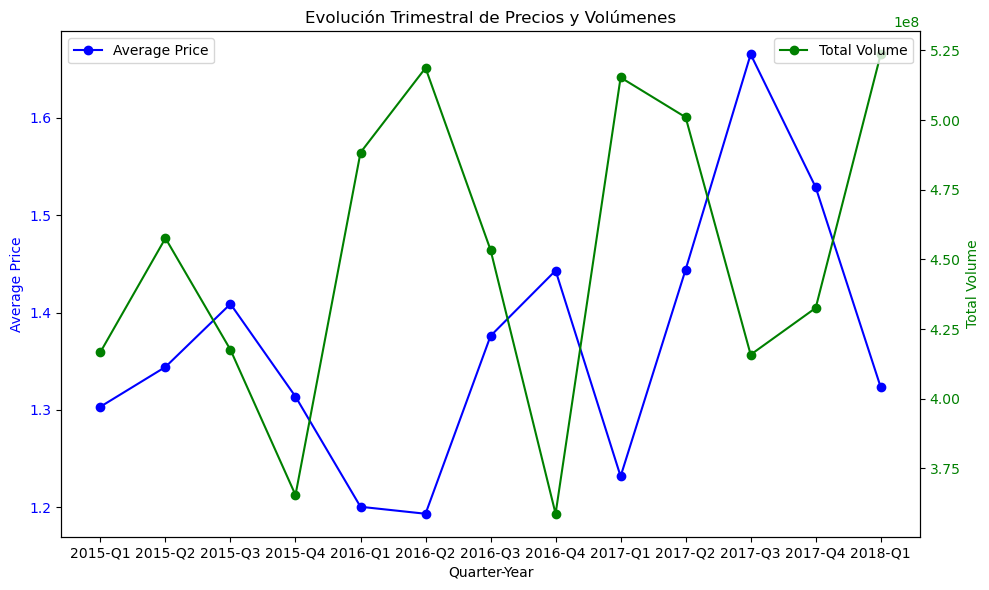

In [55]:
# Conversión de 'Date' a tipo datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


# Group by Quarter and calculate the average price and total volume
quarterly_cohort = df_filtered.groupby(pd.Grouper(key='Date', freq='QS')).agg({'AveragePrice': 'mean','Total Volume': 'sum'}).reset_index()

# Agregar una columna 'quarter-year' para mostrar year-quarter en el formato "YYYY-QX"
quarterly_cohort['quarter-year'] = quarterly_cohort['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

print(quarterly_cohort[['quarter-year', 'AveragePrice', 'Total Volume']])

# Visualizar los resultados en un gráfico de líneas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar la evolución del precio promedio en el primer eje y usando quarter-year en el eje x
ax1.plot(quarterly_cohort['quarter-year'], quarterly_cohort['AveragePrice'], label='Average Price', color='blue', marker='o')
ax1.set_xlabel('Quarter-Year')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para el volumen total
ax2 = ax1.twinx()
ax2.plot(quarterly_cohort['quarter-year'], quarterly_summary['Total Volume'], label='Total Volume', color='green', marker='o')
ax2.set_ylabel('Total Volume', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir título y leyenda
plt.title('Evolución Trimestral de Precios y Volúmenes')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar etiquetas del eje x 45 grados para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

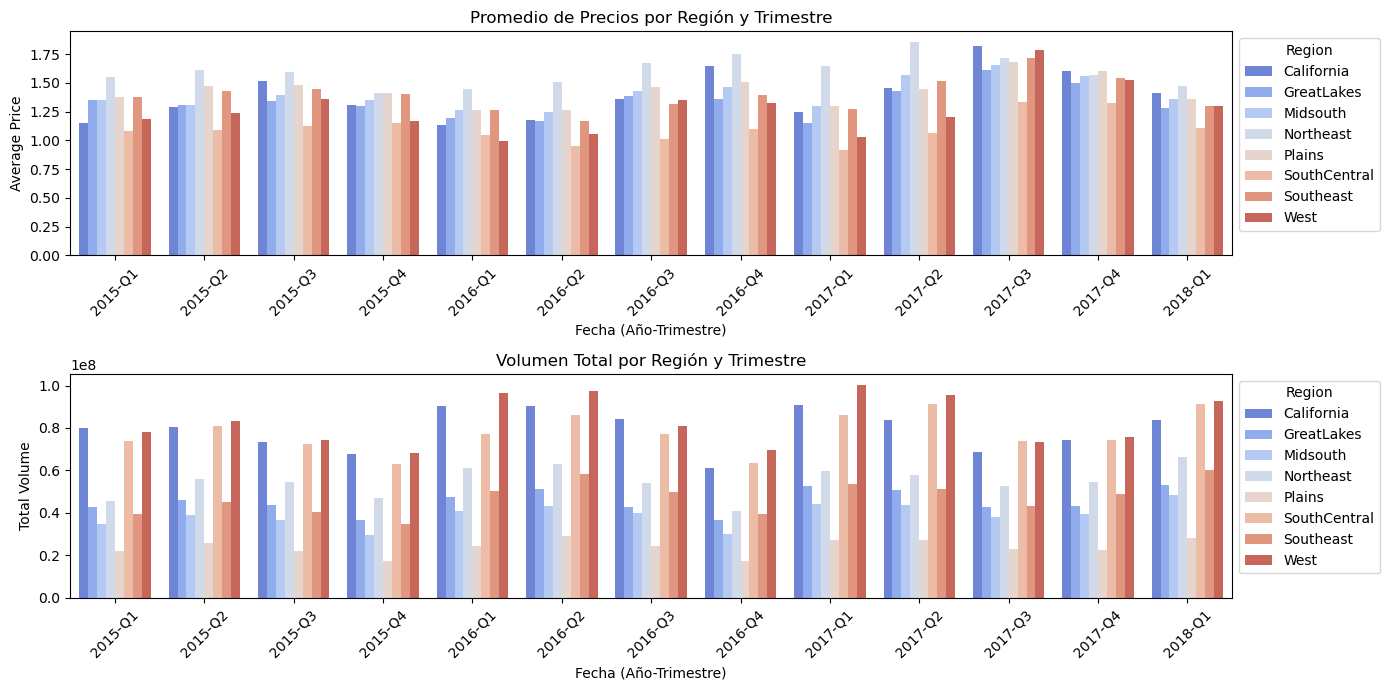

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'Date' esté en formato datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Agrupar los datos por 'region' y 'Date', calculando el promedio de AveragePrice y la suma de Total Volume
cohort_region = df_filtered.groupby(['region', pd.Grouper(key='Date', freq='QE')]).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_region['quarter-year'] = cohort_region['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Gráfico de barras para Average Price por región
plt.subplot(2, 1, 1)
sns.barplot(data=cohort_region, x='quarter-year', y='AveragePrice', hue='region', palette='coolwarm')
plt.title('Promedio de Precios por Región y Trimestre')
plt.xlabel('Fecha (Año-Trimestre)')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()

# Gráfico de barras para Total Volume por región
plt.subplot(2, 1, 2)
sns.barplot(data=cohort_region, x='quarter-year', y='Total Volume', hue='region', palette='coolwarm')
plt.title('Volumen Total por Región y Trimestre')
plt.xlabel('Fecha (Año-Trimestre)')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.tight_layout()

# Mostrar los gráficos
plt.show()



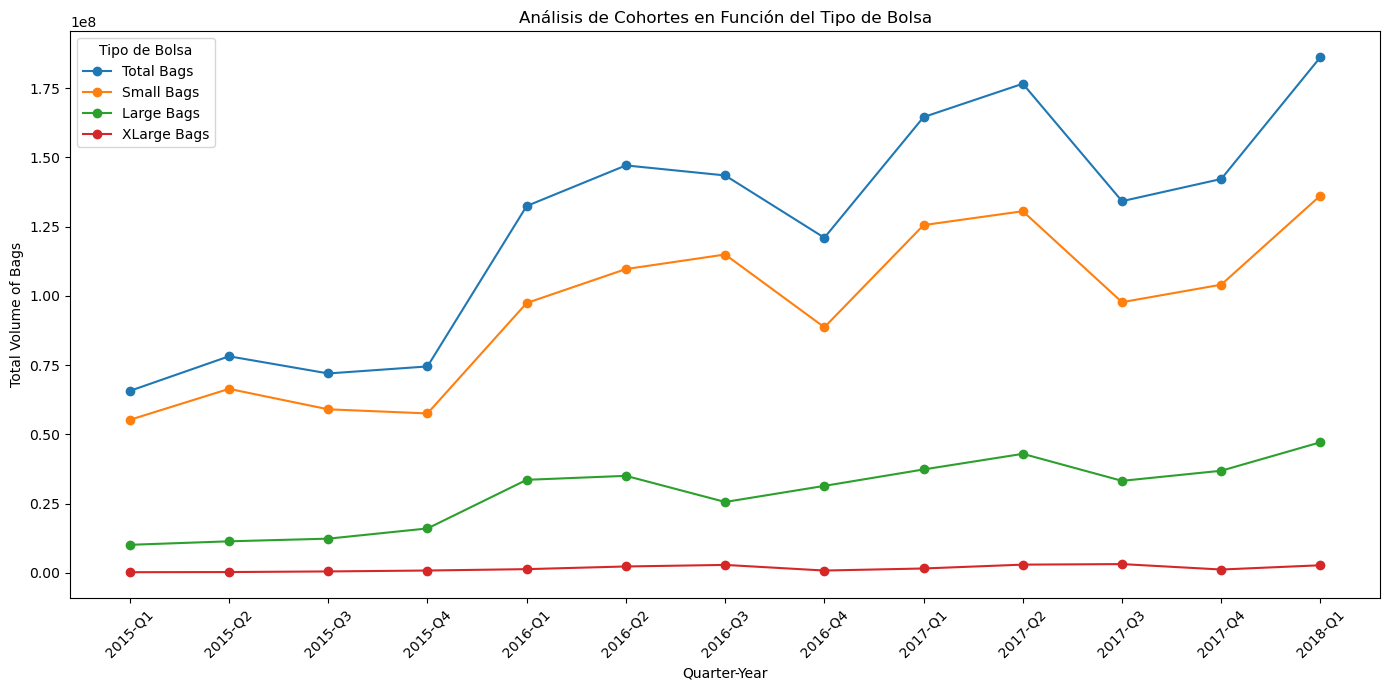

In [60]:
# Agrupar los datos por 'Date' y calcular la suma de Total Bags, Small Bags, Large Bags, y XLarge Bags
cohort_bags = df_filtered.groupby(pd.Grouper(key='Date', freq='QE')).agg({
    'Total Bags': 'sum',
    'Small Bags': 'sum',
    'Large Bags': 'sum',
    'XLarge Bags': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_bags['quarter-year'] = cohort_bags['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Graficar Total Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Total Bags'], label='Total Bags', marker='o')
# Graficar Small Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Small Bags'], label='Small Bags', marker='o')
# Graficar Large Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['Large Bags'], label='Large Bags', marker='o')
# Graficar XLarge Bags
plt.plot(cohort_bags['quarter-year'], cohort_bags['XLarge Bags'], label='XLarge Bags', marker='o')

# Añadir título y etiquetas
plt.title('Análisis de Cohortes en Función del Tipo de Bolsa')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Volume of Bags')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Tipo de Bolsa')
plt.tight_layout()  # Ajustar el diseño
plt.show()


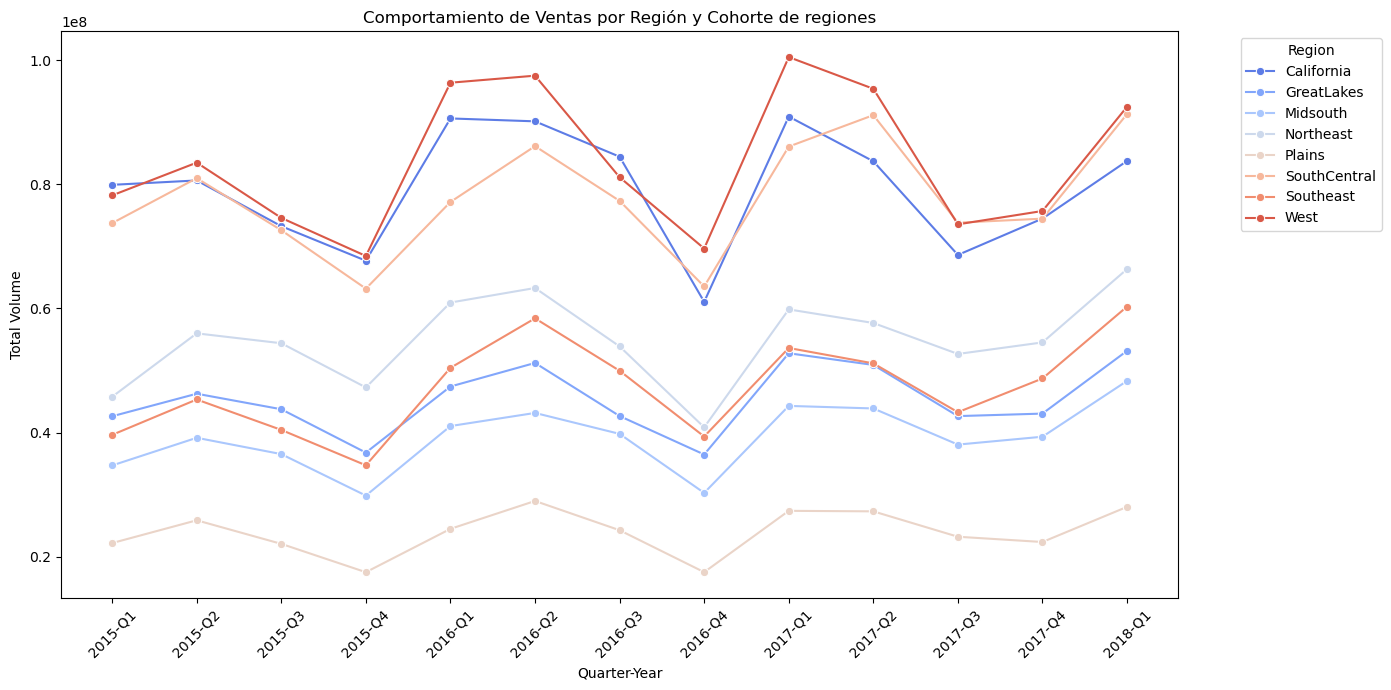

In [74]:
# Agrupar los datos por 'region' y 'Date', calculando el volumen total de ventas
cohort_sales_region = df_filtered.groupby(['region', pd.Grouper(key='Date', freq='QE')]).agg({
    'Total Volume': 'sum'
}).reset_index()

# Crear una columna 'quarter-year' para facilitar la visualización
cohort_sales_region['quarter-year'] = cohort_sales_region['Date'].dt.to_period('Q').astype(str).str.replace('Q', '-Q')

# Configuración para la visualización
plt.figure(figsize=(14, 7))

# Gráfico de líneas para el volumen total de ventas por región
sns.lineplot(data=cohort_sales_region, x='quarter-year', y='Total Volume', hue='region', marker='o', palette='coolwarm')

# Configuración del gráfico
plt.title('Comportamiento de Ventas por Región y Cohorte de regiones')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar leyenda fuera del gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()



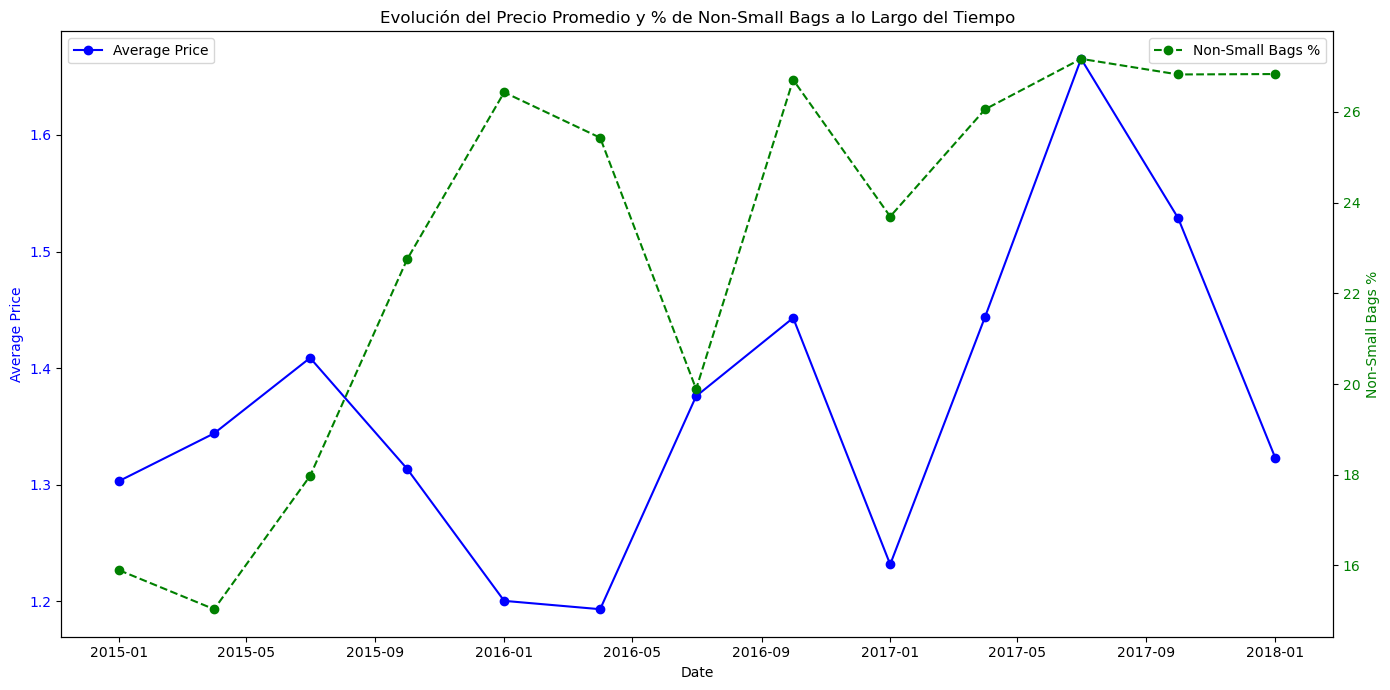

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que la columna 'Date' esté en formato datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Agrupar los datos por trimestre y calcular el promedio de precios y la suma de Total Volume
cohort_data = df_filtered.groupby(pd.Grouper(key='Date', freq='QS')).agg({
    'AveragePrice': 'mean',
    'Total Volume': 'sum',
    'Small Bags': 'sum',
    'Large Bags': 'sum',
    'XLarge Bags': 'sum'
}).reset_index()

# Calcular el total de bolsas
cohort_data['Total Bags'] = (cohort_data['Small Bags'] + cohort_data['Large Bags'] + cohort_data['XLarge Bags'])

# Calcular el porcentaje de Small bags sobre el Total Bags
cohort_data['Small Bags %'] = (cohort_data['Small Bags'] / cohort_data['Total Bags']) * 100

# Calcular el porcentaje de Non-Small bags
cohort_data['Non-Small Bags %'] = 100 - cohort_data['Small Bags %']

# Configuración para la visualización
fig, ax1 = plt.subplots(figsize=(14, 7))

# Graficar la evolución del precio promedio en el primer eje y
ax1.plot(cohort_data['Date'], cohort_data['AveragePrice'], label='Average Price', color='blue', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para el porcentaje de Non-Small bags
ax2 = ax1.twinx()
ax2.plot(cohort_data['Date'], cohort_data['Non-Small Bags %'], label='Non-Small Bags %', color='green', marker='o', linestyle='--')
ax2.set_ylabel('Non-Small Bags %', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir título y leyendas
plt.title('Evolución del Precio Promedio y % de Non-Small Bags a lo Largo del Tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()
